📌 Sample Data (Shuffled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.1               2.8                4.7               1.2   
1                5.7               3.8                1.7               0.3   
2                7.7               2.6                6.9               2.3   
3                6.0               2.9                4.5               1.5   
4                6.8               2.8                4.8               1.4   

      species  
0  Versicolor  
1      Setosa  
2   Virginica  
3  Versicolor  
4  Versicolor  

🔍 Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

📊 Data Summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866

<ipython-input-6-cc36d7897dc6>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="viridis")


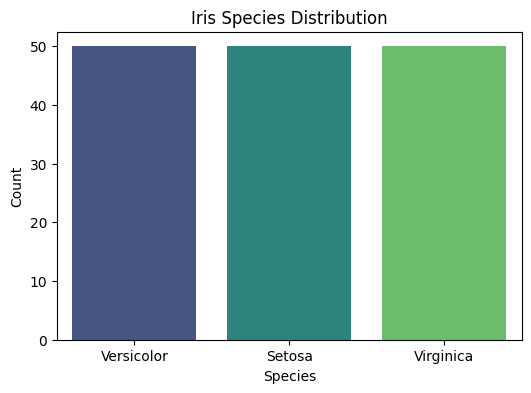

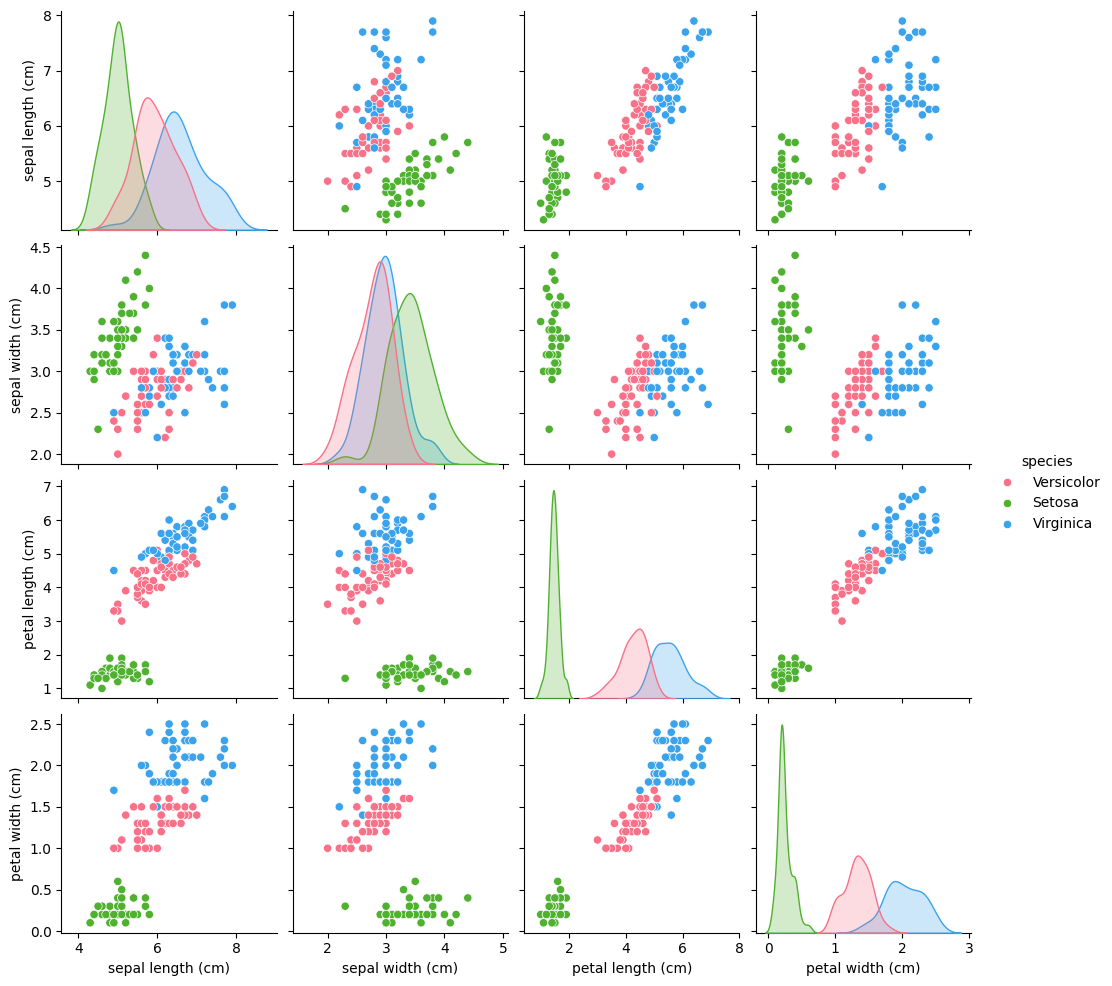


✅ Model Accuracy: 100.0 %


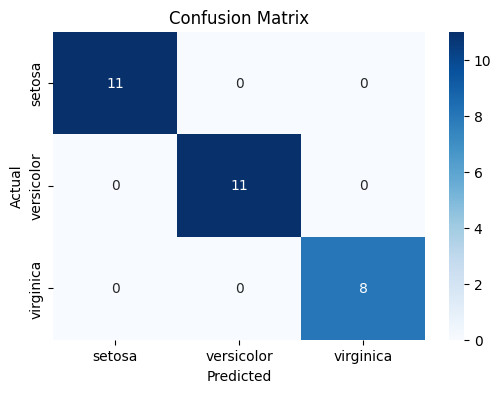


📊 Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🌸 Predicted Species for New Sample: Setosa


In [6]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # To load the Iris dataset
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation

# ---------------- Step 1: Load and Prepare Dataset ----------------
# Load dataset from sklearn (No need to download manually)
iris = datasets.load_iris()

# Convert dataset into a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add species labels (0, 1, 2) to the DataFrame
df["species"] = iris.target

# Convert numerical species values into actual names
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})

# Shuffle the dataset to ensure variety in display
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first 5 shuffled rows
print("📌 Sample Data (Shuffled):")
print(df.head())

# ---------------- Step 2: Data Exploration ----------------
# Check for missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Display statistical summary
print("\n📊 Data Summary:\n", df.describe())

# ---------------- Step 3: Data Visualization ----------------
# 📊 Count plot of species distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="species", data=df, palette="viridis")
plt.title("Iris Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# 📊 Pairplot to visualize relationships between features
sns.pairplot(df, hue="species", palette="husl")
plt.show()

# ---------------- Step 4: Prepare Data for Model Training ----------------
# Separate features (X) and target labels (y)
X = df.iloc[:, :-1]  # All columns except "species"
y = df["species"]  # Target variable (species)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- Step 5: Standardizing the Features ----------------
# StandardScaler helps normalize the data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_test = scaler.transform(X_test)  # Transform test data (without fitting)

# ---------------- Step 6: Train the Logistic Regression Model ----------------
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# ---------------- Step 7: Model Evaluation ----------------
# Predict species on the test dataset
y_pred = model.predict(X_test)

# 📊 Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# 📊 Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📊 Classification report (Precision, Recall, F1-score)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------- Step 8: Predict New Flower Species ----------------
# Define a new sample with petal & sepal measurements
new_sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

# Scale the new sample using the same StandardScaler
new_sample_scaled = scaler.transform(new_sample)

# Predict the species of the new flower
predicted_species = model.predict(new_sample_scaled)

# Print the predicted species
print("\n🌸 Predicted Species for New Sample:", predicted_species[0])
